In [176]:
from copy import deepcopy
import numpy as np
from tqdm import tqdm

In [177]:
x = np.array([[1,1]])
x

array([[1, 1]])

In [178]:
y = np.array([[0]])
y

array([[0]])

In [179]:
# W = [
#     np.array([[-0.0053, 0.3793],
#               [-0.5820, -0.5204],
#               [-0.2723, 0.1896]], dtype=np.float32).T,
#     np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32),
#     np.array([[0.1528, -0.1745, -0.1135]], dtype=np.float32).T,
#     np.array([-0.5516], dtype=np.float32)
# ]


In [180]:
W = [
    np.array(np.random.rand(3,2) * 2 - 1, dtype=np.float32).T, # input to hidden
    np.array(np.random.rand(1,3) * 2 - 1, dtype=np.float32),   # three bias values
    np.array(np.random.rand(1,3) * 2 - 1, dtype=np.float32).T, # hidden to output
    np.array(np.random.rand(1,1) * 2 - 1, dtype=np.float32)    # one bias value
]
W

[array([[-0.5062215 , -0.7836605 , -0.7161872 ],
        [ 0.35352844,  0.8800983 ,  0.91344464]], dtype=float32),
 array([[-0.19377336,  0.4425871 , -0.8281401 ]], dtype=float32),
 array([[0.38188154],
        [0.4502526 ],
        [0.9870916 ]], dtype=float32),
 array([[-0.40761703]], dtype=float32)]

In [181]:
def feed_forward(inputs, outputs, weights):
    weight_1 = weights[0]
    bias_1 = weights[1]
    pre_hidden = np.dot(inputs, weight_1) + bias_1
    hidden = 1/ (1 + np.exp(-pre_hidden))
    weight_2 = weights[2]
    bias_2 = weights[3]
    pred_out = np.dot(hidden, weight_2) + bias_2
    mse = np.mean(np.square(pred_out - outputs))
    return mse

In [182]:
def update_weights(inputs, outputs, weights, lr):
    orginal_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    orginal_loss = feed_forward(inputs, outputs, orginal_weights)
    for i, layer in enumerate(orginal_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - orginal_loss)/0.0001
            updated_weights[i][index] -= grad*lr
    return updated_weights, orginal_loss

In [183]:
losses = []
for epoch in tqdm(range(1000)):
    W, loss = update_weights(x, y, W, 0.01)
    losses.append(loss)

100%|██████████| 1000/1000 [00:00<00:00, 1652.87it/s]


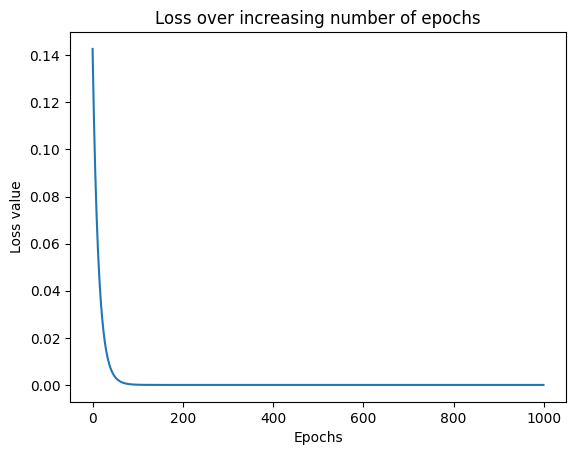

In [184]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(losses)
plt.title('Loss over increasing number of epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.show()


In [185]:
W

[array([[-0.523003  , -0.8021674 , -0.75936615],
        [ 0.33675078,  0.86159134,  0.87026566]], dtype=float32),
 array([[-0.21056311,  0.424085  , -0.87131906]], dtype=float32),
 array([[0.29858944],
        [0.32253686],
        [0.91913813]], dtype=float32),
 array([[-0.6124029]], dtype=float32)]

In [186]:
pre_hidden = np.dot(x, W[0]) + W[1]
hiden = 1/ (1 + np.exp(-pre_hidden))
pred_out = np.dot(hiden, W[2]) + W[3]
pred_out

array([[-3.69391118e-05]])